In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('trainning_data.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [6]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# here i had imputed data in the 5% vala missing column mein and we can see the effect of it after imputing

<Axes: xlabel='GarageQual'>

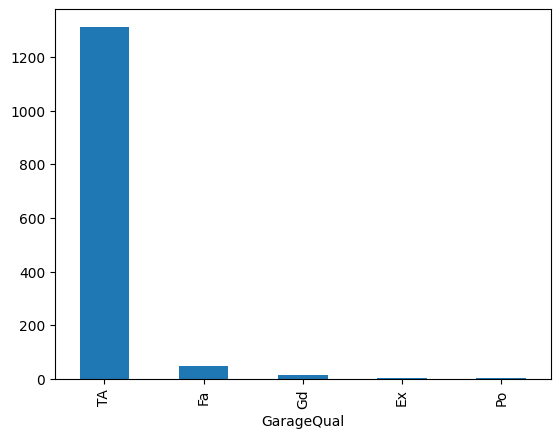

In [7]:
df['GarageQual'].value_counts().plot(kind='bar')

In [8]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

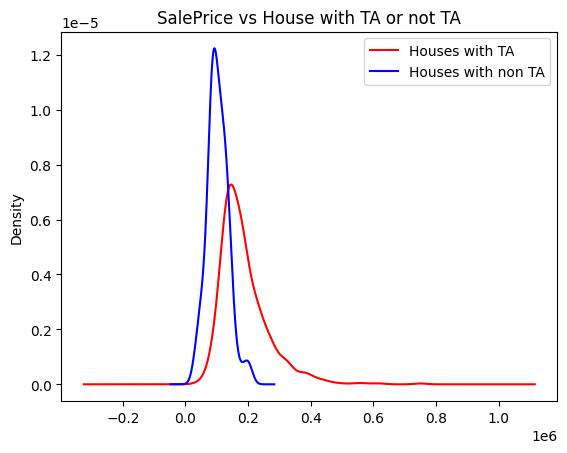

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde', ax =ax , color = 'red')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde', ax = ax , color = 'blue')
plt.title('SalePrice vs House with TA or not TA')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with non TA']
ax.legend(lines,labels, loc = 'best')

In [21]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [22]:
df['GarageQual'].fillna('TA', inplace = True)

<Axes: xlabel='GarageQual'>

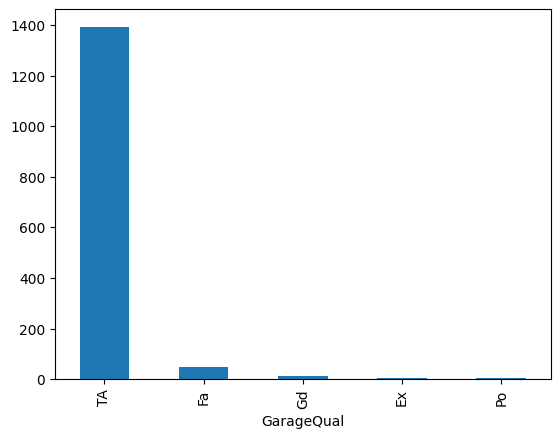

In [24]:
df['GarageQual'].value_counts().plot(kind = 'bar')

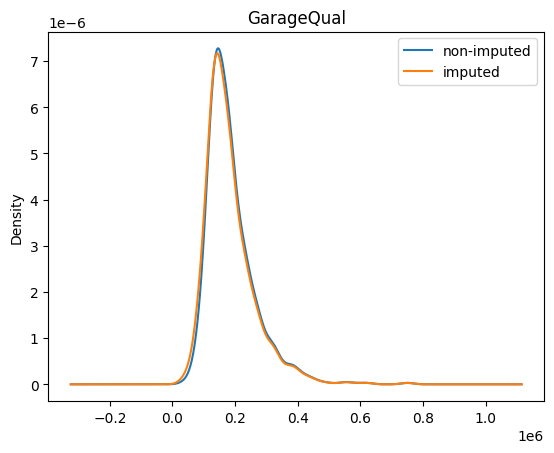

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind = 'kde', ax = ax)
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind ='kde', ax = ax)
plt.title('GarageQual')

lines, labels = ax.get_legend_handles_labels()
labels = ['non-imputed', 'imputed']
ax.legend(lines ,labels, loc ='best')

# now here i will impute the data in 47% missing vali column mein and we can see that this is not a favourable imputation

In [29]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

<Axes: xlabel='FireplaceQu'>

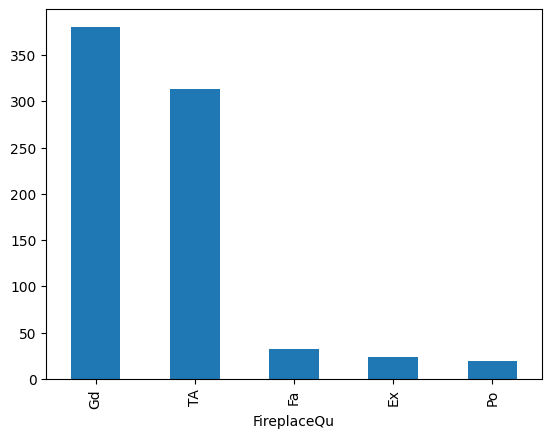

In [30]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

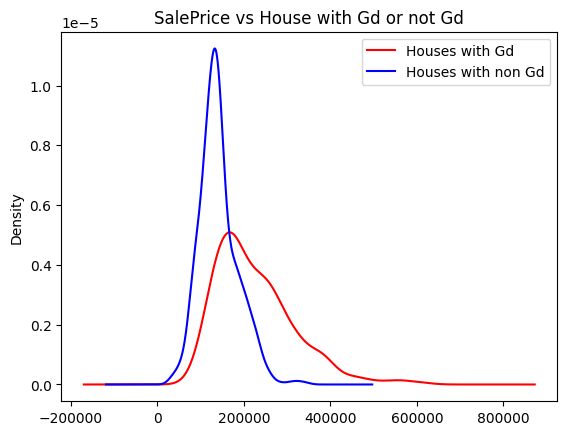

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde', ax =ax , color = 'red')
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde', ax = ax , color = 'blue')
plt.title('SalePrice vs House with Gd or not Gd')
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with non Gd']
ax.legend(lines,labels, loc = 'best')

In [35]:
temp1 = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [36]:
df['FireplaceQu'].fillna('Gd', inplace = True)

<Axes: xlabel='FireplaceQu'>

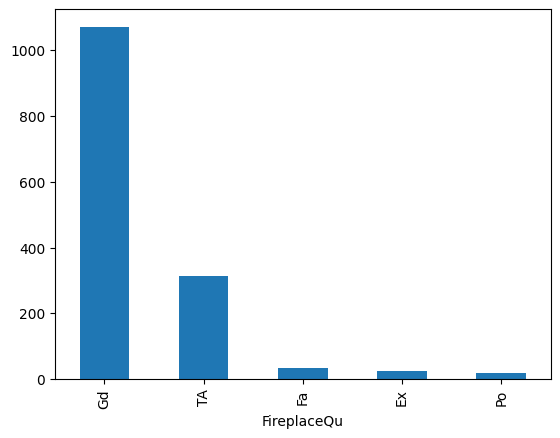

In [37]:
df['FireplaceQu'].value_counts().plot(kind = 'bar')

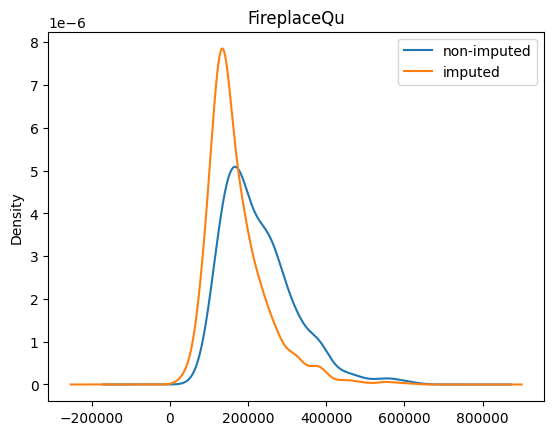

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp1.plot(kind = 'kde', ax = ax)
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind ='kde', ax = ax)
plt.title('FireplaceQu')

lines, labels = ax.get_legend_handles_labels()
labels = ['non-imputed', 'imputed']
ax.legend(lines ,labels, loc ='best')

In [40]:
# thus we can see from the above graph that after imputation there is quite bad change in the distribution graph so we should avoid such imputation 

# Now i will do the above work with sckit learn

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['SalePrice']), df['SalePrice'], test_size = 0.2, random_state= 42)

In [48]:
from sklearn.impute import SimpleImputer

In [49]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [52]:
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.fit(X_test)

In [53]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)